In [1]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error




In [2]:
df=pd.read_csv("Housing.csv")
print(df.head())
print(df.shape)
print(df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
(545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (tot

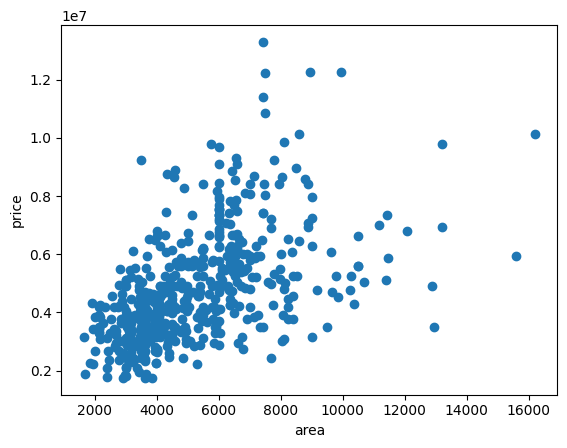

In [3]:
plt.xlabel("area")
plt.ylabel("price")

plt.scatter(df.area,df.price)

In [4]:
le=LabelEncoder()
df['airconditioning']=le.fit_transform(df["airconditioning"])
df['mainroad']=le.fit_transform(df["mainroad"])
df['guestroom']=le.fit_transform(df["guestroom"])
df['hotwaterheating']=le.fit_transform(df["hotwaterheating"])
df['prefarea']=le.fit_transform(df["prefarea"])
df['basement']=le.fit_transform(df["basement"])
oe=OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']])
df['furnishingstatus']=oe.fit_transform(df[['furnishingstatus']])

In [5]:
df.hist(figsize=(15,10))

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


<Axes: >

In [7]:
X=df.drop(['price'],axis=1)
Y=df['price']
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=0)


In [8]:
scale=StandardScaler()
scale.fit(train_x)
train_x=scale.transform(train_x)
test_x=scale.transform(test_x)



In [9]:
model1=LinearRegression()
model1.fit(train_x,train_y)
py=model1.predict(train_x)
scor_m1=metrics.r2_score(train_y,py)
print(" R squarred :",scor_m1)
sc_m12=metrics.mean_absolute_error(train_y,py)
print( "mean absolute: ",sc_m12)


 R squarred : 0.6809987305547798
mean absolute:  799720.1026620996


In [10]:
model2 = RandomForestRegressor(n_estimators=20, random_state=8)
model2.fit(train_x, train_y)
predict_y_model2 = model2.predict(train_x)


score_model2_1 = metrics.r2_score(train_y, predict_y_model2)
print("R squared error for RANDOM FOREST REGRESSOR: ", score_model2_1)

score_model2_2 = metrics.mean_absolute_error(train_y, predict_y_model2)
print('Mean Absolute Error for RANDOM FOREST REGRESSOR: ', score_model2_2)

R squared error for RANDOM FOREST REGRESSOR:  0.9317037577028381
Mean Absolute Error for RANDOM FOREST REGRESSOR:  339096.9835626911


In [11]:
model3 = XGBRegressor()
model3.fit(train_x, train_y)
predict_y_model3 = model3.predict(train_x)

# R squared error for XGBOOST
score_model3_1 = metrics.r2_score(train_y, predict_y_model3)
print("R squared error for XGBOOST: ", score_model3_1)

# Mean Absolute Error for XGBOOST
score_model3_2 = metrics.mean_absolute_error(train_y, predict_y_model3)
print('Mean Absolute Error for XGBOOST: ', score_model3_2)

R squared error for XGBOOST:  0.9973854422569275
Mean Absolute Error for XGBOOST:  54630.20212155963


In [12]:
input_data = (8800, 3, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2)

#changing input data as numpy array
input_data_numpy = np.asarray(input_data)

#reshaping the array because if we don't the model thinks we will provide 543 data but we are provided only 1 and so we need to reshape for one instance.
input_data_numpy_reshape = input_data_numpy.reshape(1,-1)

#standardise the input data
std_data  = scale.transform(input_data_numpy_reshape)

prediction1 = model1.predict(std_data)
print("Using Linear Regression prediction is : ", prediction1)

prediction2 = model2.predict(std_data)
print("Using Random Forest Regresor prediction is : ", prediction2)

prediction3 = model3.predict(std_data)
print("Using XGBoost prediction is : ", prediction3)

Using Linear Regression prediction is :  [7320115.15800163]
Using Random Forest Regresor prediction is :  [8162000.]
Using XGBoost prediction is :  [8553342.]


c:\Users\RAMGARHIA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
filename = 'house_price_prediction.sav'
pickle.dump(model2,open(filename,'wb'))
loaded_model = pickle.load(open('house_price_prediction.sav','rb'))

prediction = loaded_model.predict(std_data)

In [14]:

with open('model_pickle','wb') as f:
    pickle.dump(model1,f)



In [15]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)
mp.predict(std_data)

array([7320115.15800163])

In [16]:
joblib.dump(model2,'model2_joblib')
mj=joblib.load('model2_joblib')
mj.predict(std_data)

array([8162000.])

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Assuming df is your DataFrame
# X contains all columns except 'price'
# Y contains only the 'price' column
X = df.drop(['price'], axis=1)
Y = df['price']

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=0)

# Standardize the features
scale = StandardScaler()
scale.fit(train_x)
train_x = scale.transform(train_x)
test_x = scale.transform(test_x)

# Initialize and train the model
model1 = LinearRegression()
model1.fit(train_x, train_y)

# Make predictions on the training data
py_train = model1.predict(train_x)

# Compute metrics on the training data
scor_m1_train = metrics.r2_score(train_y, py_train)
sc_m12_train = metrics.mean_absolute_error(train_y, py_train)

print("Training R-squared:", scor_m1_train)
print("Training Mean Absolute Error:", sc_m12_train)

# Make predictions on the test data
py_test = model1.predict(test_x)

# Compute metrics on the test data
scor_m1_test = metrics.r2_score(test_y, py_test)
sc_m12_test = metrics.mean_absolute_error(test_y, py_test)

print("Test R-squared:", scor_m1_test)
print("Test Mean Absolute Error:", sc_m12_test)


Training R-squared: 0.6809987305547798
Training Mean Absolute Error: 799720.1026620996
Test R-squared: 0.6578047592637604
Test Mean Absolute Error: 716583.4396615445
